In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/eth_courses/Autumn22/nlp/spanningtrees/

/content/drive/MyDrive/eth_courses/Autumn22/nlp/spanningtrees


In [ ]:
!apt install -y graphviz
!pip install graphviz torch torchtext transformers datasets conllu 

In [ ]:
from benji_transformer_play import *

scorer = Scorer2().to(device)
scorer.load_state_dict(torch.load('runs/colab_07_21-14_26_16/save_epoch29.pt', map_location=device))

data = datasets.load_dataset("universal_dependencies", "en_gum")
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
val_data = [sequence for sequence in data['test'] if len(sequence['tokens']) < 20]
model = AutoModel.from_pretrained("bert-base-cased", output_hidden_states=True).to(device)

input_data = val_data[:4]
sentences_embedding, sentences_word_embeddings, targets = get_embeddings(input_data, tokenizer, model)
i = 0
word_embeddings, sentence_embedding, target = sentences_word_embeddings[i], sentences_embedding[i], targets[i]

loss, pred, constr, mst_prob, mst_neg_log_prob, target_prob, target_neg_log_probs = do_train(word_embeddings, sentence_embedding, target, scorer)


Generating test split:   0%|          | 0/890 [00:00<?, ? examples/s]

Dataset universal_dependencies downloaded and prepared to /root/.cache/huggingface/datasets/universal_dependencies/en_gum/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
loss, constr, target, target_prob, mst_prob, mst_neg_log_prob, target_neg_log_probs

(tensor(20.5728, grad_fn=<NllLossBackward0>),
 array([-1,  2,  0,  4,  2,  7,  7,  4, 10, 10,  4,  2]),
 tensor([ 2,  0,  4,  2,  7,  7,  2, 10, 10,  2,  2]),
 tensor(0., grad_fn=<ExpBackward0>),
 tensor(0., grad_fn=<ExpBackward0>),
 tensor(inf, grad_fn=<AddBackward0>),
 tensor(inf, grad_fn=<AddBackward0>))

In [ ]:
data['train'][0]

{'deprel': ['amod', 'root', 'cc', 'amod', 'conj', 'punct'],
 'deps': ['None', 'None', 'None', 'None', 'None', 'None'],
 'feats': ["{'Degree': 'Pos'}",
  "{'Number': 'Sing'}",
  'None',
  "{'Degree': 'Pos'}",
  "{'Number': 'Sing'}",
  'None'],
 'head': ['2', '0', '5', '5', '2', '2'],
 'idx': 'GUM_academic_art-1',
 'lemmas': ['aesthetic', 'appreciation', 'and', 'Spanish', 'art', ':'],
 'misc': ["{'Discourse': 'preparation:1->57', 'Entity': '(abstract-1'}",
  "{'Entity': 'abstract-1)'}",
  'None',
  "{'Entity': '(abstract-2'}",
  "{'Entity': 'abstract-2)', 'SpaceAfter': 'No'}",
  'None'],
 'text': 'Aesthetic Appreciation and Spanish Art:',
 'tokens': ['Aesthetic', 'Appreciation', 'and', 'Spanish', 'Art', ':'],
 'upos': [6, 0, 9, 6, 0, 1],
 'xpos': ['JJ', 'NN', 'CC', 'JJ', 'NN', ':']}

In [ ]:
data['train'][0]['head']

['2', '0', '5', '5', '2', '2']

TypeError: ignored

In [ ]:

help(G.edge)

Help on method edge in module graphviz.dot:

edge(tail_name, head_name, label=None, _attributes=None, **attrs) method of graphviz.dot.Digraph instance
    Create an edge between two nodes.
    
    Args:
        tail_name: Start node identifier.
        head_name: End node identifier.
        label: Caption to be displayed near the edge.
        attrs: Any additional edge attributes (must be strings).



In [ ]:

help(G.node)

Help on method node in module graphviz.dot:

node(name, label=None, _attributes=None, **attrs) method of graphviz.dot.Digraph instance
    Create a node.
    
    Args:
        name: Unique identifier for the node inside the source.
        label: Caption to be displayed (defaults to the node ``name``).
        attrs: Any additional node attributes (must be strings).



['The', 'prevalence', 'of', 'discrimination', 'across', 'racial', 'groups', 'in', 'contemporary', 'America', ':']


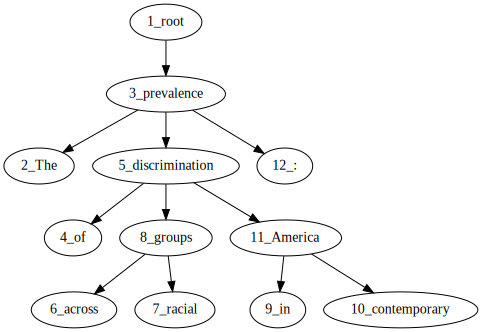

In [ ]:
import graphviz

def get_graphviz(tokens, dep_to_head):
  G = graphviz.Digraph()
  tokens = ['root'] + tokens
  # print(tokens)
  for i, token in enumerate(tokens):
    G.node('q' + str(i), str(i+1) + '_' + token)

  for dep_i, head_i in enumerate(dep_to_head):
    h, d = tokens[head_i], tokens[dep_i + 1]
    # print(h, d)
    G.edge('q' + str(head_i), 'q' + str(dep_i + 1))
  return G


G = get_graphviz(data['train'][0]['tokens'], list(map(int, data['train'][0]['head'])))
G1 = get_graphviz(input_data[0]['tokens'], constr[1:])
print(input_data[0]['tokens'])
G2 = get_graphviz(input_data[0]['tokens'], list(target.detach().numpy()))
G1

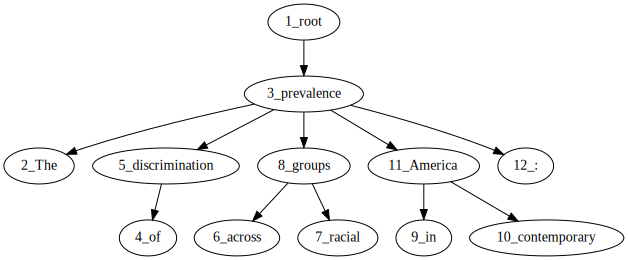

In [ ]:
G2